In [1]:
#Packages Used
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import readability

## Import Datasets

Datasets Used:

- OpenFoodFacts Product Dataset (2,168,141 rows x 191 columns)

- FoodDataCentral Branded Food Dataset (1,555,131 rows x 17 columns)

At the moment, empty product names are being filled in as "Unknown" to confirm whether further analysis is possible. Future lookup, either via website or database parsing, is required to verify identity.

- OpenFoodFacts Product Dataset (subset where country = United states) - 412,108 rows x 191 columns

In [2]:
OpenFoodFacts_Demo = pd.read_csv("OpenFoodFacts_Head_Demo.csv")
OpenFoodFacts_Demo.fillna({'product_name':"Unknown"}, inplace=True)
for i in OpenFoodFacts_Demo.columns.values:
    print(i)

Unnamed: 0
code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
abbreviated_product_name
generic_name
quantity
packaging
packaging_tags
packaging_en
packaging_text
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
origins_en
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
serving_quantity
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutriscore_score
nutriscore_grade
nova_group
pnns_groups_1
pnns_groups_2
food_groups
food_groups_tags
food_groups_en
states
st

In [ ]:
print(OpenFoodFacts_Demo["brands"])

In [3]:
FoodDataCentral_Demo = pd.read_csv("FoodDataCentral_Head_Demo.csv")
print(FoodDataCentral_Demo)

     Unnamed: 0   fdc_id                               brand_owner  \
0             0  1105904  Richardson Oilseed Products (US) Limited   
1             1  1105905                     CAMPBELL SOUP COMPANY   
2             2  1105906                     CAMPBELL SOUP COMPANY   
3             3  1105907                     CAMPBELL SOUP COMPANY   
4             4  1105908                     CAMPBELL SOUP COMPANY   
..          ...      ...                                       ...   
495         495  1106399                     Vermont Creamery Inc.   
496         496  1106400                     Vermont Creamery Inc.   
497         497  1106401                     Carl Buddig & Company   
498         498  1106402                     Carl Buddig & Company   
499         499  1106403                     Carl Buddig & Company   

     brand_name  subbrand_name     gtin_upc  \
0           NaN            NaN  27000612323   
1           NaN            NaN  51000198808   
2           NaN   

In [18]:
#Get Readability Scores- Open Food Facts
readability_scores = []
for index, row in OpenFoodFacts_Demo.iterrows():
    if pd.isna(row["ingredients_text"]) or row["ingredients_text"] in ['🍎', "..."]:
        curr_record = (row['product_name'], row['code'], pd.NA,pd.NA,pd.NA)
        readability_scores.append(curr_record)
        print([i for i in curr_record])
    else:
        """Readability.getmeasures() automatically tokenizes the input by default and returns a set of readability measures. In this case,
        we are getting a specific measure from the set (flesch-kincaid) """
        curr_record = (row['code'], row['product_name'],readability.getmeasures(row["ingredients_text"])['readability grades']['Kincaid'],
                       readability.getmeasures(row["ingredients_text"])['readability grades']['FleschReadingEase'],
                       readability.getmeasures(row["ingredients_text"])['readability grades']['DaleChallIndex'],
                       readability.getmeasures(row["ingredients_text"])['sentence info']['words'],
                       readability.getmeasures(row["ingredients_text"])['sentence info']['complex_words_dc'])
        readability_scores.append(curr_record)
        print([i for i in curr_record])


readScores_OFF = pd.DataFrame(data = readability_scores, columns = ["code", "product_name",
                                                                    "Kincaid_Score","FleschReadingEase","DaleChallIndex",
                                                                    "num_words","complex_words_dc"])
readScores_OFF.to_csv("OpenFoodFacts_Readability.csv", sep=",")
for value in readScores_OFF.columns.values:
    OpenFoodFacts_Demo[value] = readScores_OFF[value]
    

[1, 'hyde icon', 49.85346534653465, -82.47009900990096, 21.153030693069304, 101, 80]
[4530, 'Banana Chips Sweetened (Whole)', 12.286666666666669, 33.690000000000026, 8.591166666666666, 15, 4]
[4559, 'Peanuts', 14.98090909090909, 26.841363636363653, 11.904972727272728, 22, 10]
[16087, 'Organic Salted Nut Mix', 14.656666666666666, 11.355000000000025, 14.758366666666666, 12, 8]
[16094, 'Organic Polenta', 14.690000000000001, -6.694999999999991, 19.5257, 2, 2]
[16100, 'Breadshop Honey Gone Nuts Granola', 14.040000000000003, 30.02500000000002, 16.471000000000004, 20, 15]
[16117, 'Organic Long Grain White Rice', 0.5199999999999996, 100.24000000000001, 7.0425, 5, 1]
[16124, 'Organic Muesli', 41.227999999999994, -22.410999999999973, 18.7021, 100, 64]
[16193, 'Organic Dark Chocolate Minis', 16.662105263157894, 9.4447368421053, 12.058373684210526, 19, 9]
[16513, 'Organic Sunflower Oil', 12.605000000000004, 18.940000000000033, 13.902050000000001, 8, 5]
[16612, 'Organic Adzuki Beans', 9.18000000000

[45599, 'Peanuts', 14.98090909090909, 26.841363636363653, 11.904972727272728, 22, 10]
[58001, 'Organic Salted Pistachios', 9.57, 33.57500000000002, 11.7299, 4, 2]
[58018, 'Organic Dried Turkish Apricots, Bin # 5801', 14.690000000000001, -6.694999999999991, 19.5257, 2, 2]
[58056, 'Organic Unsalted Pistachios', 20.590000000000007, -48.994999999999976, 19.5257, 2, 2]
[58070, 'Organic Medjool Dates', 13.113333333333333, 6.390000000000002, 19.5753, 3, 3]
[58131, 'Organic Pitted Prunes', 1.3133333333333361, 90.99000000000002, 14.311966666666665, 3, 2]
[58148, 'Organic Pitted Deglet Dates', 6.620000000000001, 54.72500000000002, 19.6249, 4, 4]
[58179, 'Sweetened Dried Cranberries', 8.383333333333333, 45.64500000000001, 9.197433333333333, 6, 2]
[58223, 'Organic Zante Currants', 5.246666666666666, 62.790000000000006, 19.5753, 3, 3]
[58230, 'Organic Thompson Raisins', 11.520000000000003, 28.50000000000002, 12.855122222222224, 9, 5]
[58247, 'Organic Unrefined Extra Virgin Coconut Oil', 14.28333333

[417296003, 'Milk Chocolate With Caramelized Almonds', 13.390476190476189, 36.46285714285716, 13.700957142857144, 21, 12]
['Madeleine nature et choconoir', 42, <NA>, <NA>, <NA>]
[433070274, 'Funsch, High Quality Marzipan', 9.087500000000002, 58.40750000000001, 13.311975, 16, 9]
[433821494, 'Oatmeal Raisin Cookies', 17.323809523809526, 8.262857142857143, 11.445242857142857, 21, 9]
[433821500, 'The Best Peanut Butter Cookies', 11.3, 42.54500000000003, 10.35135, 16, 6]
[433906023, 'Best Sweet-Potato Cookies', 11.07263157894737, 49.518421052631595, 9.565215789473683, 19, 6]
[433906030, 'Best Ginger Snap Cookies', 10.500000000000004, 55.405000000000015, 10.155000000000001, 20, 7]
[450193000, 'Lactaid, ice cream, vanilla', 11.169411764705881, 45.26235294117649, 13.767935294117647, 17, 10]
[450193024, 'Natural ice cream', 11.863529411764706, 40.2858823529412, 11.910288235294118, 17, 8]
[450193031, 'Lactaid, ice cream, butter pecan', 11.07263157894737, 49.518421052631595, 12.889426315789473, 1

[790105046, 'Soft chewy twisted candy bites', 37.673589743589744, -36.111923076923034, 17.627094871794874, 78, 50]
[790105251, 'Dr pepper, gummy candies', 20.13379310344828, 2.3655172413793117, 15.964555172413794, 29, 20]
[790105268, 'Gummy soda bottles', 20.099999999999998, 6.170000000000023, 14.342487096774194, 31, 18]
[790105275, 'Crush, gummy soda bottles, orange', 24.097272727272728, 0.6659090909091105, 15.508218181818183, 44, 27]
[790105282, 'Healthy Food Brands, A&W, Soda Bottles Gummy Candies With Real A&W Root Beer', 19.571428571428573, -7.851428571428528, 13.700957142857144, 21, 12]
[790110002, 'Emojeez, Gummies, Assorted Fruits', 12.568000000000001, 49.48400000000001, 14.9821, 25, 16]
[790110019, 'Emojeez, Gummies Candy, Fruit', 12.568000000000001, 49.48400000000001, 14.9821, 25, 16]
[790110026, 'Emojeez, Fruit Flavored Gummies, Green Apple, Orange, Fruit Punch, Lemon, Cherry Blue Raspberry', 12.568000000000001, 49.48400000000001, 14.9821, 25, 16]
[790110033, 'Gummies', 12.5

[946701306, 'Vegetarian meat substitute', 11.784285714285716, 35.51071428571431, 13.353757142857143, 14, 8]
[946701504, 'Vegetarian meat substitute bits', 10.562500000000004, 47.832500000000024, 14.29885, 16, 10]
[946701573, 'Vegetarian meat substitute', 21.953636363636367, -23.149545454545446, 16.929063636363637, 22, 17]
[946706004, 'Dehydrated apple slices', 15.469999999999999, -8.72499999999999, 15.6774, 4, 3]
[946800504, 'Honey cornbread muffin mix', 30.271428571428576, -22.22642857142855, 14.591064285714287, 56, 29]
[946801211, 'Pancake mix', 30.786153846153855, -33.041153846153826, 15.932623076923077, 52, 32]
[946803116, 'Bread, scone & roll mix', 36.870000000000005, -37.47499999999998, 17.335683783783786, 74, 47]
[946804106, 'Biscuit mix', 31.466923076923084, -37.92192307692306, 16.53993076923077, 52, 34]
[946901539, 'Creamy wheat cereal', -3.3999999999999986, 121.22000000000001, 0, 1, 0]
[946901614, 'Dried egg product whole eggs', 11.706666666666667, 32.505, 13.442533333333335,

In [ ]:
print(FoodDataCentral_Demo['ingredients'][2])

In [ ]:
print(OpenFoodFacts_Demo['ingredients_text'][1])

In [4]:
#Readability scores example
for i in range(500):
    print(readability.getmeasures(FoodDataCentral_Demo.loc[i]['ingredients']))

OrderedDict([('readability grades', OrderedDict([('Kincaid', 14.690000000000001), ('ARI', 7.829999999999998), ('Coleman-Liau', 4.684661999999999), ('FleschReadingEase', -6.694999999999991), ('GunningFogIndex', 0.8), ('LIX', 52.0), ('SMOGIndex', 3.0), ('RIX', 1.0), ('DaleChallIndex', 0)])), ('sentence info', OrderedDict([('characters_per_word', 6.0), ('syll_per_word', 2.5), ('words_per_sentence', 2.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 1.0), ('characters', 12), ('syllables', 5), ('words', 2), ('wordtypes', 2), ('sentences', 1), ('paragraphs', 1), ('long_words', 1), ('complex_words', 0), ('complex_words_dc', 0)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 0), ('pronoun', 0), ('preposition', 0), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition', 0)]))])
OrderedDict([('readability grades', OrderedDict([('Kincaid

OrderedDict([('readability grades', OrderedDict([('Kincaid', -2.33), ('ARI', 25.215294117647055), ('Coleman-Liau', 20.337455823529417), ('FleschReadingEase', 172.32500000000002), ('GunningFogIndex', 13.600000000000001), ('LIX', 75.1764705882353), ('SMOGIndex', 3.0), ('RIX', 14.0), ('DaleChallIndex', 13.682311764705885)])), ('sentence info', OrderedDict([('characters_per_word', 6.294117647058823), ('syll_per_word', 0.0), ('words_per_sentence', 34.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.5882352941176471), ('characters', 214), ('syllables', 0), ('words', 34), ('wordtypes', 20), ('sentences', 1), ('paragraphs', 1), ('long_words', 14), ('complex_words', 0), ('complex_words_dc', 18)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 0), ('pronoun', 0), ('preposition', 2), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition

OrderedDict([('readability grades', OrderedDict([('Kincaid', 13.66), ('ARI', 45.272), ('Coleman-Liau', 20.259775133333335), ('FleschReadingEase', 130.71000000000004), ('GunningFogIndex', 30.0), ('LIX', 112.33333333333334), ('SMOGIndex', 3.0), ('RIX', 28.0), ('DaleChallIndex', 16.198900000000002)])), ('sentence info', OrderedDict([('characters_per_word', 6.2), ('syll_per_word', 0.0), ('words_per_sentence', 75.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.76), ('characters', 465), ('syllables', 0), ('words', 75), ('wordtypes', 57), ('sentences', 1), ('paragraphs', 1), ('long_words', 28), ('complex_words', 0), ('complex_words_dc', 42)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 2), ('pronoun', 0), ('preposition', 6), ('nominalization', 1)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition', 0)]))])
OrderedDict([('readability grades', Order

OrderedDict([('readability grades', OrderedDict([('Kincaid', -0.379999999999999), ('ARI', 27.416923076923077), ('Coleman-Liau', 20.076542487179488), ('FleschReadingEase', 167.25), ('GunningFogIndex', 15.600000000000001), ('LIX', 87.71794871794872), ('SMOGIndex', 3.0), ('RIX', 19.0), ('DaleChallIndex', 14.073207692307694)])), ('sentence info', OrderedDict([('characters_per_word', 6.230769230769231), ('syll_per_word', 0.0), ('words_per_sentence', 39.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.6923076923076923), ('characters', 243), ('syllables', 0), ('words', 39), ('wordtypes', 27), ('sentences', 1), ('paragraphs', 1), ('long_words', 19), ('complex_words', 0), ('complex_words_dc', 21)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 0), ('pronoun', 0), ('preposition', 0), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('prepositi

OrderedDict([('readability grades', OrderedDict([('Kincaid', 6.25), ('ARI', 34.15714285714285), ('Coleman-Liau', 18.109979000000003), ('FleschReadingEase', 149.995), ('GunningFogIndex', 22.400000000000002), ('LIX', 93.5), ('SMOGIndex', 3.0), ('RIX', 21.0), ('DaleChallIndex', 13.181242857142857)])), ('sentence info', OrderedDict([('characters_per_word', 5.857142857142857), ('syll_per_word', 0.0), ('words_per_sentence', 56.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.6964285714285714), ('characters', 328), ('syllables', 0), ('words', 56), ('wordtypes', 39), ('sentences', 1), ('paragraphs', 1), ('long_words', 21), ('complex_words', 0), ('complex_words_dc', 24)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 3), ('pronoun', 0), ('preposition', 5), ('nominalization', 1)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition', 0)]))])
OrderedDict([(

OrderedDict([('readability grades', OrderedDict([('Kincaid', 12.880000000000003), ('ARI', 42.81383561643836), ('Coleman-Liau', 18.428629561643838), ('FleschReadingEase', 132.74), ('GunningFogIndex', 29.200000000000003), ('LIX', 120.94520547945206), ('SMOGIndex', 3.0), ('RIX', 35.0), ('DaleChallIndex', 19.802779452054793)])), ('sentence info', OrderedDict([('characters_per_word', 5.890410958904109), ('syll_per_word', 0.0), ('words_per_sentence', 73.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.863013698630137), ('characters', 430), ('syllables', 0), ('words', 73), ('wordtypes', 63), ('sentences', 1), ('paragraphs', 1), ('long_words', 35), ('complex_words', 0), ('complex_words_dc', 58)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 3), ('pronoun', 0), ('preposition', 2), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('prepositio

OrderedDict([('readability grades', OrderedDict([('Kincaid', -9.35), ('ARI', 13.358125000000001), ('Coleman-Liau', 15.791643562500003), ('FleschReadingEase', 190.595), ('GunningFogIndex', 6.4), ('LIX', 47.25), ('SMOGIndex', 3.0), ('RIX', 5.0), ('DaleChallIndex', 12.3251)])), ('sentence info', OrderedDict([('characters_per_word', 5.6875), ('syll_per_word', 0.0), ('words_per_sentence', 16.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 1.0), ('characters', 91), ('syllables', 0), ('words', 16), ('wordtypes', 16), ('sentences', 1), ('paragraphs', 1), ('long_words', 5), ('complex_words', 0), ('complex_words_dc', 8)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 1), ('pronoun', 0), ('preposition', 0), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition', 0)]))])
OrderedDict([('readability grades', OrderedDict([('Kincaid', -10.91

OrderedDict([('readability grades', OrderedDict([('Kincaid', 0.7899999999999991), ('ARI', 31.19428571428572), ('Coleman-Liau', 22.973736523809528), ('FleschReadingEase', 164.205), ('GunningFogIndex', 16.8), ('LIX', 89.61904761904762), ('SMOGIndex', 3.0), ('RIX', 20.0), ('DaleChallIndex', 16.62231904761905)])), ('sentence info', OrderedDict([('characters_per_word', 6.714285714285714), ('syll_per_word', 0.0), ('words_per_sentence', 42.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.8333333333333334), ('characters', 282), ('syllables', 0), ('words', 42), ('wordtypes', 35), ('sentences', 1), ('paragraphs', 1), ('long_words', 20), ('complex_words', 0), ('complex_words_dc', 29)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 0), ('pronoun', 0), ('preposition', 0), ('nominalization', 1)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition', 0)]))])
Or

OrderedDict([('readability grades', OrderedDict([('Kincaid', 10.540000000000003), ('ARI', 38.08044776119403), ('Coleman-Liau', 16.228413761194034), ('FleschReadingEase', 138.83), ('GunningFogIndex', 26.8), ('LIX', 101.32835820895522), ('SMOGIndex', 3.0), ('RIX', 23.0), ('DaleChallIndex', 15.915222388059702)])), ('sentence info', OrderedDict([('characters_per_word', 5.522388059701493), ('syll_per_word', 0.0), ('words_per_sentence', 67.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.7761194029850746), ('characters', 370), ('syllables', 0), ('words', 67), ('wordtypes', 52), ('sentences', 1), ('paragraphs', 1), ('long_words', 23), ('complex_words', 0), ('complex_words_dc', 38)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 5), ('pronoun', 0), ('preposition', 0), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition', 0)]))])
O

OrderedDict([('readability grades', OrderedDict([('Kincaid', -10.129999999999999), ('ARI', 10.802142857142854), ('Coleman-Liau', 13.585020642857145), ('FleschReadingEase', 192.625), ('GunningFogIndex', 5.6000000000000005), ('LIX', 28.285714285714285), ('SMOGIndex', 3.0), ('RIX', 2.0), ('DaleChallIndex', 8.84232857142857)])), ('sentence info', OrderedDict([('characters_per_word', 5.357142857142857), ('syll_per_word', 0.0), ('words_per_sentence', 14.0), ('sentences_per_paragraph', 1.0), ('type_token_ratio', 0.7142857142857143), ('characters', 75), ('syllables', 0), ('words', 14), ('wordtypes', 10), ('sentences', 1), ('paragraphs', 1), ('long_words', 2), ('complex_words', 0), ('complex_words_dc', 4)])), ('word usage', OrderedDict([('tobeverb', 0), ('auxverb', 0), ('conjunction', 0), ('pronoun', 0), ('preposition', 0), ('nominalization', 0)])), ('sentence beginnings', OrderedDict([('pronoun', 0), ('interrogative', 0), ('article', 0), ('subordination', 0), ('conjunction', 0), ('preposition'

In [19]:
#Get Readability Scores- FoodData Central
readability_scores = []
for index, row in FoodDataCentral_Demo.iterrows():
    num_words = len(word_tokenize(row['ingredients']))
    if pd.isna(row["ingredients"]) or row["ingredients"] in ["---"]:
        curr_record = (row['fdc_id'], row['gtin_upc'], pd.NA,pd.NA)
        readability_scores.append(curr_record)
        
    else:
        """Readability.getmeasures() automatically tokenizes the input by default and returns a set of readability measures. In this case,
        we are getting a specific measure from the set (flesch-kincaid) """
        curr_record = (row['fdc_id'], row['gtin_upc'], row['branded_food_category'],readability.getmeasures(row["ingredients"])['readability grades']['Kincaid'],
                       readability.getmeasures(row["ingredients"])['readability grades']['FleschReadingEase'],
                       readability.getmeasures(row["ingredients"])['readability grades']['DaleChallIndex'],
                       readability.getmeasures(row["ingredients"])['sentence info']['words'],
                       readability.getmeasures(row["ingredients"])['sentence info']['complex_words_dc'])
        readability_scores.append(curr_record)
        

readScores_FDC = pd.DataFrame(data = readability_scores, columns = ["fdc_id", "gtin_upc","branded_food_category",
                                                                    "Kincaid_Score","FleschReadingEase","DaleChallIndex",
                                                                    "num_words","complex_words_dc"])
print(readScores_FDC.columns.values)
readScores_FDC.to_csv("FoodData_Central_Readability.csv", sep=",")
for value in readScores_FDC.columns.values:
    FoodDataCentral_Demo[value] = readScores_FDC[value]
    print(value)

['fdc_id' 'gtin_upc' 'branded_food_category' 'Kincaid_Score'
 'FleschReadingEase' 'DaleChallIndex' 'num_words' 'complex_words_dc']
fdc_id
gtin_upc
branded_food_category
Kincaid_Score
FleschReadingEase
DaleChallIndex
num_words
complex_words_dc


In [ ]:
#Plot Mean Readability by Category
df = readScores_FDC.groupby(by="branded_food_category").mean()
print(df)
plt.scatter(df["num_words"], df['FleschReadingEase'])
plt.show()

In [ ]:
#Plot by Brand
df = FoodDataCentral_Demo.groupby(by="brand_owner").mean()
print(df['FleschReadingEase'])
plt.scatter(df["num_words"], df['FleschReadingEase'])
plt.show()

In [ ]:
series = pd.notnull(OpenFoodFacts_Demo['brands'])
df = OpenFoodFacts_Demo[series]

df = df.groupby(by = 'brands').mean()
print(df)
plt.scatter(df["num_words"], df['FleschReadingEase'])
plt.show()

                                   Unnamed: 0     created_t  last_modified_t  \
brands                                                                         
Active foods                           1527.0  1.639985e+09     1.639985e+09   
Alter Eco                               313.0  1.489056e+09     1.545997e+09   
Angry Birds                            1361.0  1.489110e+09     1.577761e+09   
Annie's                                1586.0  1.591925e+09     1.600655e+09   
Astruc                                 1643.0  1.628508e+09     1.628508e+09   
...                                       ...           ...              ...   
Welch's,  Healthy Food Brands Llc      1341.5  1.489081e+09     1.565700e+09   
Wholesome,  Wholesome Sweeteners        183.0  1.489053e+09     1.517524e+09   
Wise Woodworks                          936.5  1.489078e+09     1.587589e+09   
Woodstock                               246.0  1.489056e+09     1.517526e+09   
kendall farms                          1

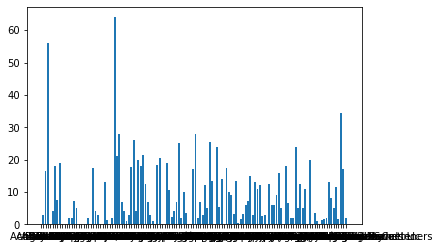

In [22]:
series = pd.notnull(OpenFoodFacts_Demo['brands'])
df = OpenFoodFacts_Demo[series]
df = df.groupby(by = 'brands').mean()
print(df)
plt.bar(list(df.index.values), df["complex_words_dc"])
plt.show()